In [1]:
import numpy as np

# Define possible actions in the environment
ACTION_SPACE = ('U', 'D', 'L', 'R')  # U: Up, D: Down, L: Left, R: Right

class Grid:  # Environment representing a grid world
  def __init__(self, rows, cols, start):
    """
    Initialize the grid environment with the given dimensions and starting position.
    :param rows: Number of rows in the grid
    :param cols: Number of columns in the grid
    :param start: Starting position (i, j) for the agent
    """
    self.rows = rows
    self.cols = cols
    self.i = start[0]
    self.j = start[1]

  def set(self, rewards, actions):
    """
    Set the rewards and possible actions for each cell in the grid.
    :param rewards: Dictionary where keys are (i, j) positions and values are rewards
    :param actions: Dictionary where keys are (i, j) positions and values are lists of allowed actions
    """
    self.rewards = rewards
    self.actions = actions

  def set_state(self, s):
    """
    Set the agent's position in the grid to a specific state.
    :param s: Tuple (i, j) representing the agent's new position
    """
    self.i = s[0]
    self.j = s[1]

  def current_state(self):
    """
    Returns the current state (position) of the agent.
    :return: Tuple (i, j) representing the agent's current position
    """
    return (self.i, self.j)

  def is_terminal(self, s):
    """
    Check if a state is terminal, meaning there are no actions available from this state.
    :param s: Tuple (i, j) representing a state
    :return: True if the state is terminal, False otherwise
    """
    return s not in self.actions

  def reset(self):
    """
    Reset the agent to the starting position.
    :return: Tuple (i, j) representing the agent's start position
    """
    self.i = 2
    self.j = 0
    return (self.i, self.j)

  def get_next_state(self, s, a):
    """
    Get the next state given a current state and an action.
    :param s: Current state (i, j) as a tuple
    :param a: Action to be taken ('U', 'D', 'L', 'R')
    :return: Tuple (new_i, new_j) representing the next state after taking action
    """
    i, j = s[0], s[1]

    # Update position based on the action, if the action is allowed from the current state
    if a in self.actions[(i, j)]:
      if a == 'U':
        i -= 1
      elif a == 'D':
        i += 1
      elif a == 'R':
        j += 1
      elif a == 'L':
        j -= 1
    return i, j

  def move(self, action):
    """
    Move the agent in the specified direction, if the action is allowed from the current position.
    :param action: Action to take ('U', 'D', 'L', 'R')
    :return: Reward received after taking the action
    """
    # Check if the action is valid in the current state
    if action in self.actions[(self.i, self.j)]:
      if action == 'U':
        self.i -= 1
      elif action == 'D':
        self.i += 1
      elif action == 'R':
        self.j += 1
      elif action == 'L':
        self.j -= 1
    # Return the reward for the new position, defaulting to 0 if no reward is defined
    return self.rewards.get((self.i, self.j), 0)

  def undo_move(self, action):
    """
    Undo the last move, moving the agent in the opposite direction of the action.
    :param action: Action to undo ('U', 'D', 'L', 'R')
    """
    # Move in the opposite direction of the specified action
    if action == 'U':
      self.i += 1
    elif action == 'D':
      self.i -= 1
    elif action == 'R':
      self.j -= 1
    elif action == 'L':
      self.j += 1
    # Ensure the state after undoing is valid
    assert(self.current_state() in self.all_states())

  def game_over(self):
    """
    Check if the game is over, which is true if the agent is in a terminal state.
    :return: True if in a terminal state, False otherwise
    """
    return (self.i, self.j) not in self.actions

  def all_states(self):
    """
    Get all possible states in the grid, defined as any position with actions or rewards.
    :return: Set of tuples representing all possible states
    """
    return set(self.actions.keys()) | set(self.rewards.keys())


def standard_grid():
  """
  Define a standard 3x4 grid with rewards and actions.
  Layout:
    .  .  .  1
    .  x  . -1
    s  .  .  .
  Legend:
    - s: Starting position
    - x: Blocked position (no actions allowed)
    - Numbers: Rewards at certain states

  :return: An instance of the Grid class with rewards and actions set
  """
  g = Grid(3, 4, (2, 0))  # 3x4 grid with start position at (2, 0)

  # Define rewards for reaching specific states
  rewards = {(0, 3): 1, (1, 3): -1}

  # Define possible actions from each state
  actions = {
    (0, 0): ('D', 'R'),  # Can go Down or Right from (0, 0)
    (0, 1): ('L', 'R'),  # Can go Left or Right from (0, 1)
    (0, 2): ('L', 'D', 'R'),  # Can go Left, Down, or Right from (0, 2)
    (1, 0): ('U', 'D'),  # Can go Up or Down from (1, 0)
    (1, 2): ('U', 'D', 'R'),  # Can go Up, Down, or Right from (1, 2)
    (2, 0): ('U', 'R'),  # Can go Up or Right from (2, 0)
    (2, 1): ('L', 'R'),  # Can go Left or Right from (2, 1)
    (2, 2): ('L', 'R', 'U'),  # Can go Left, Right, or Up from (2, 2)
    (2, 3): ('L', 'U'),  # Can go Left or Up from (2, 3)
  }

  # Set rewards and actions in the grid
  g.set(rewards, actions)
  return g

def negative_grid(step_cost=-0.1):
  """
  Create a variation of the standard grid where each move incurs a penalty.

  This function modifies the rewards in the standard grid to include a step cost,
  penalizing each move the agent makes. This incentivizes the agent to minimize
  the number of steps taken to reach terminal states.

  :param step_cost: The penalty for each step taken (default: -0.1).
  :return: An instance of the Grid class with updated rewards.
  """
  # Create the standard grid
  g = standard_grid()

  # Update the rewards in the grid to include a step cost
  # The step cost is applied to all non-terminal states
  g.rewards.update({
    (0, 0): step_cost,  # Penalize movement in state (0, 0)
    (0, 1): step_cost,  # Penalize movement in state (0, 1)
    (0, 2): step_cost,  # Penalize movement in state (0, 2)
    (1, 0): step_cost,  # Penalize movement in state (1, 0)
    (1, 2): step_cost,  # Penalize movement in state (1, 2)
    (2, 0): step_cost,  # Penalize movement in state (2, 0)
    (2, 1): step_cost,  # Penalize movement in state (2, 1)
    (2, 2): step_cost,  # Penalize movement in state (2, 2)
    (2, 3): step_cost,  # Penalize movement in state (2, 3)
    })

  # Return the modified grid
  return g

Episode 0/100
Episode 10/100
Episode 20/100
Episode 30/100
Episode 40/100
Episode 50/100
Episode 60/100
Episode 70/100
Episode 80/100
Episode 90/100

Rewards:
---------------------------
-0.10|-0.10|-0.10| 1.00|
---------------------------
-0.10| 0.00|-0.10|-1.00|
---------------------------
-0.10|-0.10|-0.10|-0.10|


Optimal Policy:
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  R  |  R  |  U  |  L  |


Final Value Function:
---------------------------
 0.62| 0.80| 1.00| 0.00|
---------------------------
 0.46| 0.00| 0.80| 0.00|
---------------------------
 0.31| 0.46| 0.62| 0.46|




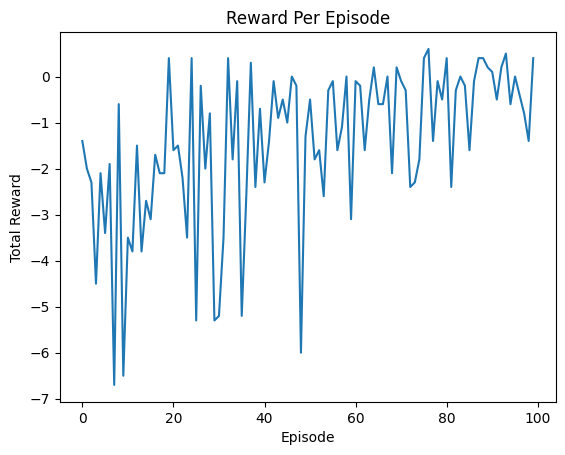

In [6]:
import tensorflow as tf
from collections import deque
import random
import matplotlib.pyplot as plt

# Define possible actions for the grid world environment
ALL_POSSIBLE_ACTIONS = ('U', 'D', 'L', 'R')  # U: Up, D: Down, L: Left, R: Right

def print_values(V, g):
    """
    Print the value function in a grid layout.
    :param V: Dictionary mapping each state to its value.
    :param g: Grid object, used for dimensions and layout.
    """
    for i in range(g.rows):
        print("---------------------------")
        for j in range(g.cols):
            v = V.get((i, j), 0)  # Get the value for each state, default to 0 if not in V
            if v >= 0:
                print(" %.2f|" % v, end="")  # Format for positive values
            else:
                print("%.2f|" % v, end="")  # Format for negative values
        print("")
    print("\n")

def print_policy(P, g):
    """
    Print the policy in a grid layout.
    :param P: Dictionary mapping each state to the optimal action under the policy.
    :param g: Grid object, used for dimensions and layout.
    """
    for i in range(g.rows):
        print("---------------------------")
        for j in range(g.cols):
            a = P.get((i, j), ' ')  # Get the action for each state, default to blank if not in policy
            print("  %s  |" % a, end="")
        print("")
    print("\n")

class ReplayBuffer:
    """
    Replay Buffer for storing and sampling experiences for Deep Q-Learning.
    """
    def __init__(self, max_size):
        """
        Initialize the replay buffer with a maximum size.
        :param max_size: Maximum number of experiences to store.
        """
        self.buffer = deque(maxlen=max_size)  # Double-ended queue to store experiences

    def add(self, experience):
        """
        Add a new experience to the buffer.
        :param experience: Tuple (state, action, reward, next_state, done).
        """
        self.buffer.append(experience)

    def sample(self, batch_size):
        """
        Randomly sample a batch of experiences from the buffer.
        :param batch_size: Number of experiences to sample.
        :return: List of sampled experiences.
        """
        return random.sample(self.buffer, batch_size)

    def size(self):
        """
        Get the current number of experiences in the buffer.
        :return: Integer size of the buffer.
        """
        return len(self.buffer)

class DQNAgent:
    """
    Deep Q-Network Agent for approximating Q-values and learning an optimal policy.
    """
    def __init__(self, state_dim, action_dim, gamma=0.9, alpha=0.001):
        """
        Initialize the agent with a neural network, target network, and replay buffer.
        :param state_dim: Dimension of the state space (input size for the neural network).
        :param action_dim: Number of possible actions (output size for the neural network).
        :param gamma: Discount factor for future rewards.
        :param alpha: Learning rate for the neural network.
        """
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.gamma = gamma  # Discount factor
        self.alpha = alpha  # Learning rate

        # Neural network for estimating Q-values (Main Q-Network)
        self.model = self.build_model()

        # Target Q-Network (used for stabilizing training)
        self.target_model = self.build_model()
        self.update_target_network()

        # Replay buffer for storing experiences
        self.replay_buffer = ReplayBuffer(max_size=10000)

    def build_model(self):
      """
      Build and compile the neural network for Q-value approximation.
      :return: Compiled Keras model.
      """
      # Define the input layer explicitly
      inputs = tf.keras.Input(shape=(self.state_dim,))
      x = tf.keras.layers.Dense(64, activation='relu')(inputs)  # Hidden layer 1
      x = tf.keras.layers.Dense(64, activation='relu')(x)  # Hidden layer 2
      outputs = tf.keras.layers.Dense(self.action_dim, activation='linear')(x)  # Output layer

      # Create the model
      model = tf.keras.Model(inputs=inputs, outputs=outputs)
      model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=self.alpha),  # Optimizer
                  loss='mse')  # Mean Squared Error loss function
      return model

    def update_target_network(self):
        """
        Update the target network by copying weights from the main network.
        This helps stabilize learning.
        """
        self.target_model.set_weights(self.model.get_weights())

    def epsilon_greedy(self, state, epsilon):
        """
        Choose an action using the epsilon-greedy strategy.
        :param state: Current state as a numpy array.
        :param epsilon: Probability of selecting a random action.
        :return: Index of the selected action.
        """
        if np.random.random() < epsilon:
            # Exploration: Choose a random action
            return np.random.choice(self.action_dim)
        else:
            # Exploitation: Choose the action with the highest Q-value
            q_values = self.model.predict(state[np.newaxis], verbose=0)
            return np.argmax(q_values[0])

    def train(self, batch_size):
        """
        Train the Q-network using a minibatch of experiences.
        :param batch_size: Number of experiences to sample for training.
        """
        if self.replay_buffer.size() < batch_size:
            return  # Do not train until the buffer has enough samples

        # Sample a minibatch from the replay buffer
        minibatch = self.replay_buffer.sample(batch_size)

        # Unpack the minibatch
        states, actions, rewards, next_states, dones = zip(*minibatch)

        # Convert data to numpy arrays
        states = np.array(states)
        next_states = np.array(next_states)
        rewards = np.array(rewards)
        dones = np.array(dones, dtype=np.float32)

        # Predict Q-values for current and next states
        current_qs = self.model.predict(states, verbose=0)
        next_qs = self.target_model.predict(next_states, verbose=0)

        # Compute target Q-values
        targets = current_qs.copy()
        for i in range(batch_size):
            if dones[i]:
                # If the episode ended, the Q-value is just the reward
                targets[i, actions[i]] = rewards[i]
            else:
                # Update Q-value with the Bellman equation
                targets[i, actions[i]] = rewards[i] + self.gamma * np.max(next_qs[i])

        # Train the model on the batch
        self.model.fit(states, targets, verbose=0, epochs=1)

    def remember(self, experience):
        """
        Store an experience in the replay buffer.
        :param experience: Tuple (state, action, reward, next_state, done).
        """
        self.replay_buffer.add(experience)


def deep_q_learning(grid, gamma=0.9, alpha=0.001, epsilon=0.1, epsilon_decay=0.995, episodes=10000, batch_size=32, target_update_freq=10, plot=True, verbose=True):
    """
    Perform Deep Q-Learning to learn an optimal policy in the given grid environment.
    :param grid: Grid object representing the environment.
    :param gamma: Discount factor for future rewards.
    :param alpha: Learning rate for the neural network.
    :param epsilon: Initial exploration probability.
    :param epsilon_decay: Decay rate for exploration probability.
    :param episodes: Number of episodes to run.
    :param batch_size: Size of minibatches for training.
    :param target_update_freq: Frequency (in episodes) for updating the target network.
    :param verbose: Whether to print progress during training.
    :return: A tuple (policy, value function) derived from the learned Q-values.
    """
    state_dim = 2  # Grid world states are 2D (row, column)
    action_dim = len(ALL_POSSIBLE_ACTIONS)  # Number of actions

    # Initialize the DQN agent
    agent = DQNAgent(state_dim, action_dim, gamma, alpha)

    rewards_per_episode = []  # Track rewards for each episode

    for episode in range(episodes):
        if verbose and episode % (episodes // 10) == 0:
            print(f"Episode {episode}/{episodes}")

        # Reset the environment and initialize variables
        state = np.array(grid.reset())
        total_reward = 0
        done = False

        while not done:
            # Choose an action using epsilon-greedy strategy
            action_idx = agent.epsilon_greedy(state, epsilon)
            action = ALL_POSSIBLE_ACTIONS[action_idx]

            # Take the action in the environment
            reward = grid.move(action)
            next_state = np.array(grid.current_state())
            done = grid.game_over()

            # Store the experience in the replay buffer
            agent.remember((state, action_idx, reward, next_state, done))

            # Update the state and total reward
            state = next_state
            total_reward += reward

            # Train the agent using the replay buffer
            agent.train(batch_size)

        rewards_per_episode.append(total_reward)  # Log total reward for the episode

        # Decay the exploration rate
        epsilon = max(0.01, epsilon * epsilon_decay)

        # Update the target network periodically
        if episode % target_update_freq == 0:
            agent.update_target_network()

    # Derive the policy and value function from the learned Q-network
    policy = {}
    V = {}
    for s in grid.actions.keys():
        state = np.array(s)
        q_values = agent.model.predict(state[np.newaxis], verbose=0)
        best_action_idx = np.argmax(q_values[0])
        policy[s] = ALL_POSSIBLE_ACTIONS[best_action_idx]
        V[s] = np.max(q_values)

    # Print rewards, policy, and value function
    print("\nRewards:")
    print_values(grid.rewards, grid)

    print("Optimal Policy:")
    print_policy(policy, grid)

    print("Final Value Function:")
    print_values(V, grid)

    # Plot rewards if plot=True
    if plot:
        plt.plot(rewards_per_episode)
        plt.title("Reward Per Episode")
        plt.xlabel("Episode")
        plt.ylabel("Total Reward")
        plt.show()

    return policy, V


if __name__ == "__main__":
    gamma = 0.9  # Discount factor
    alpha = 0.001  # Learning rate
    epsilon = 1.0  # Initial exploration probability
    epsilon_decay = 0.995  # Epsilon decay rate
    episodes = 100  # Total number of episodes

    # Use the negative grid with step costs for the environment
    grid = negative_grid(step_cost=-0.1)

    # Run Deep Q-Learning and learn the optimal policy
    deep_q_learning(grid, gamma=gamma, alpha=alpha, epsilon=epsilon, epsilon_decay=epsilon_decay, episodes=episodes, plot=True, batch_size=32)